In [3]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import glob
import os

from tqdm.auto import tqdm
from skimage import measure
from skimage.io import imsave, imread
from skimage.color import rgb2hsv
from skimage.filters import threshold_otsu

def show_image_contours(image, contours):
    plt.figure()
    for n, contour in enumerate(contours):
        plt.plot(contour[:, 1], contour[:, 0], linewidth=3)
    plt.imshow(image, interpolation='nearest', cmap='gray_r')
    plt.title('Contours')
    plt.axis('off')

# 1 Vidéo tracking

Dans cet exercise on va réaliser du tracking vidéo, l'idée est d'identifier un objet sur une séquence d'images assez courte (environ 15 secondes) et d'obtenir des informations sur la trajectoire de cet objet.

Dans un premier temps à partir de la vidéo on va tenter de créer une suite d'images

  0%|          | 0/2 [00:00<?, ?it/s]

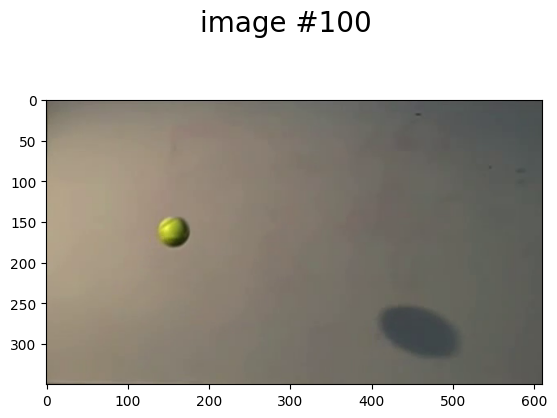

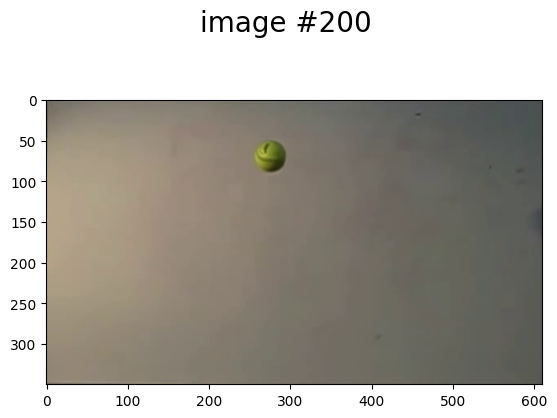

In [4]:
filename = 'data/misc/ball.mp4'
vid = imageio.get_reader(filename,  'ffmpeg')
nums = [100, 200]
for num in tqdm(nums):
    image = vid.get_data(num)
    fig = plt.figure()
    fig.suptitle('image #{}'.format(num), fontsize=20)
    plt.imshow(image[:-10, 15:-15])
plt.show()


#### 📝 Q1: En utilisant la fonction makedirs de la librarie 'os' créer un dossier 'out' dans lequel vous enregistrerez les images de la vidéo.

#### 📝 Q2: Enregistrez chaque image croppée (__avec les mêmes coordonnées [:-10, 15:-15] que dans la cellule précédente__) dont le nom sera son index dans le dossier 'path_out'.

#### 📝 Q3: En utilisant la fonction glob de la librarie 'glob' vérifier le nombre d'images jpg contenues dans le dossier de sortie 'out'.

In [5]:
path_out = 'out'

#Q1: Create the output folder to store the frames
""""""
os.makedirs(path_out, exist_ok=True)
""""""
for i, frame in tqdm(enumerate(vid)): #For each frame n°i in vid
    #Q2: Save frame in output folder
    _path = '{}/{}.jpg'.format(path_out, i)
    """"""
    #TODO
    imsave(_path, frame[:-10, 15:-15])
    """"""
    
#Check the content of the output folder
""""""
n_images = len(glob.glob('out/*.jpg'))
""""""

print('Le dossier contient {} images'.format(n_images))

0it [00:00, ?it/s]

Le dossier contient 430 images


In [6]:
path_out = 'out'
n_images = len(glob.glob('out/*.jpg'))

#### 📝 Q4: Charger img_rgb: la 100ème image du dossier et affichez la.

#### 📝 Q5: A l'aide de la fonction 'rgb2hsv' de librairie 'skimage' convertissez l'image RGB dans le domaine HSV et affichez separément les canaux H, S et V.

#### 📝 Q6: Que remarquez vous sur le canal dont l'indice est 1.

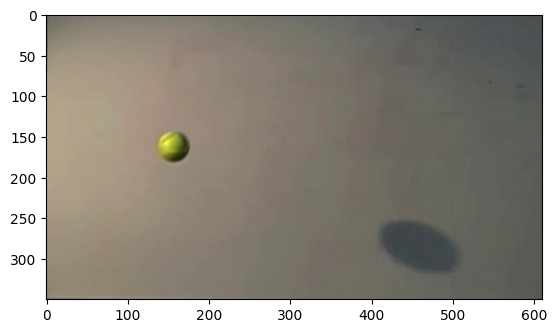

In [7]:
idx = 100
img_rgb = imread('{}/{}.jpg'.format(path_out, idx))

plt.imshow(img_rgb)

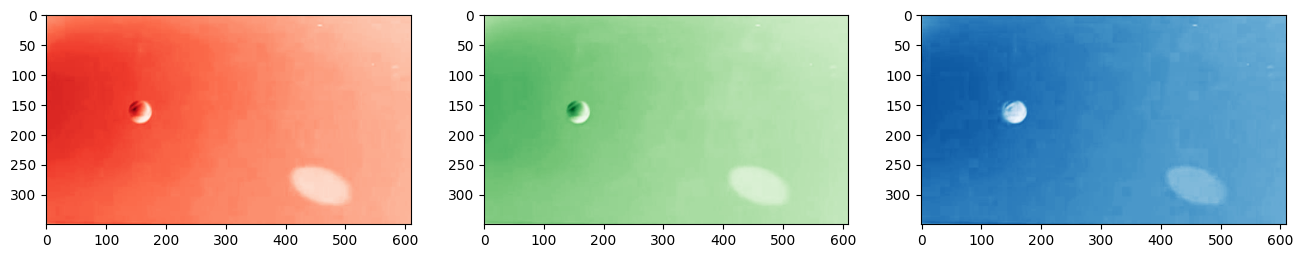

In [8]:
R, G, B = img_rgb[:, :, 0], img_rgb[:, :, 1], img_rgb[:, :, 2]

fig, axs = plt.subplots(1, 3, figsize=(16, 8))
axs[0].imshow(R, cmap='Reds')
axs[1].imshow(G, cmap='Greens')
axs[2].imshow(B, cmap='Blues')
plt.show()

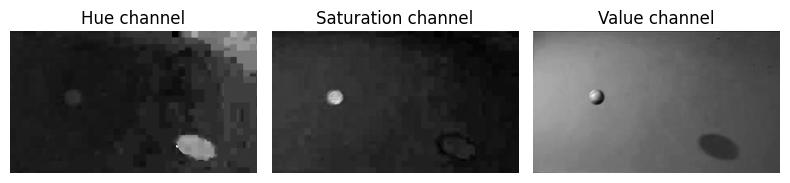

In [11]:
""""""
hsv_img = rgb2hsv(img_rgb) #Changement de domaine couleur
hue_img = hsv_img[:, :, 0] 
saturation_img = hsv_img[:, :, 1]
value_img = hsv_img[:, :, 2]
""""""

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 2))

ax0.imshow(hue_img, cmap='gray')
ax0.set_title("Hue channel")
ax0.axis('off')
ax1.imshow(saturation_img, cmap='gray')
ax1.set_title("Saturation channel")
ax1.axis('off')
ax2.imshow(value_img, cmap='gray')
ax2.set_title("Value channel")
ax2.axis('off')

fig.tight_layout()

Q7: Que remarquez vous sur le canal dont l'indice est 2.

Q8: En utilisant le code suivant, jouez avec la valeur de saturation_threshold pour effectuer une segmentation efficace de l'image, quelle valeure obtenez vous ?

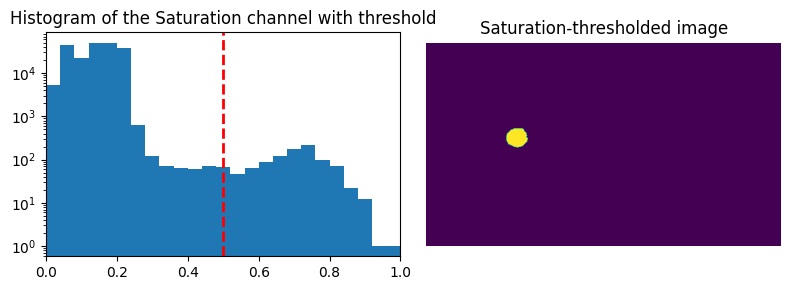

In [12]:
""""""
saturation_threshold = 0.5
""""""
binary_img = saturation_img > saturation_threshold

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 3))

ax0.hist(saturation_img.ravel(), 25)
ax0.set_yscale('log')
ax0.set_title("Histogram of the Saturation channel with threshold")
ax0.axvline(x=saturation_threshold, color='r', linestyle='dashed', linewidth=2)
ax0.set_xbound(0, 1)
ax1.imshow(binary_img)
ax1.set_title("Saturation-thresholded image")
ax1.axis('off')

fig.tight_layout()

#### 📝 Q9: En utilisant la fonction 'find_contours' de skimage réaliser l'extraction du contour de la balle depuis l'image binarisée avec le paramètre 'level=0.8'.

#### 📝 Q10: Avec la fonction 'show_image_contours' affichez le tracer du contour de la balle sur l'image originale.

#### 📝 Q11: All right ? Combien de contours contient l'object 'contours' ? Note : bien regarder sur le côté

In [17]:
from skimage.measure import find_contours

""""""
contours = find_contours(binary_img, level=0.8)
""""""

''

L'object contours contient 1 contours


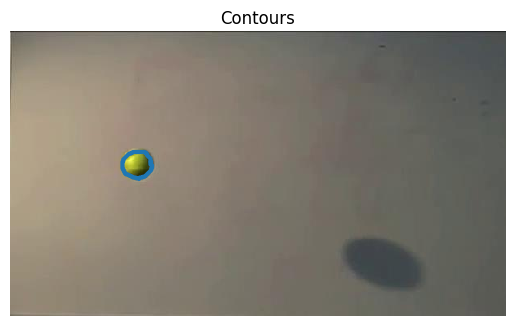

In [18]:
""""""
show_image_contours(img_rgb, contours)
""""""

""""""
n_contours = len(contours)
""""""
print('L\'object contours contient {} contours'.format(n_contours))

On va uniquement garder le contours le plus grand si contours en contient plusieurs.

In [19]:
dots_contours = [np.shape(cnt)[0] for cnt in contours]
idx = np.argmax(dots_contours)

contours = [contours[idx]]
print('L\'object contours contient {} contours'.format(len(contours)))

c = contours[0].mean(axis=0)

print('Le centre du contour se trouve aux coordonnées [x, y]=[{:.2f}, {:.2f}]'.format(c[0], c[1]))

L'object contours contient 1 contours
Le centre du contour se trouve aux coordonnées [x, y]=[163.90, 156.24]


#### 📝 Q12: Affichez l'unique contour souhaité.

''

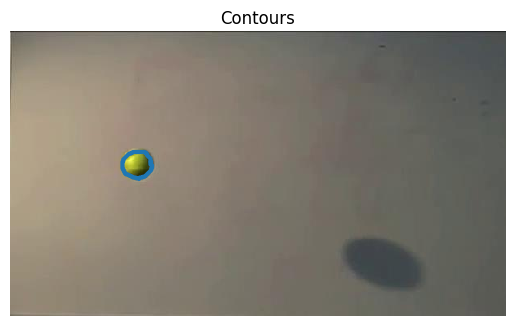

In [20]:
""""""
show_image_contours(img_rgb, contours)
""""""

Q13: Complétez la fonction suivante pour qu'elle retourne systématiquement le centre de la balle. Vous devriez trouver le même résultat que celui affiché juste avant la Q12.

In [22]:
def getPos(img_rgb):
    hsv_img = rgb2hsv(img_rgb)
    saturation_img = hsv_img[:, :, 1]
    binary_img = saturation_img > 0.5
    contours = find_contours(binary_img)
    
    n_contours = len(contours)
    if(n_contours > 1):
        dots_contours = [np.shape(cnt)[0] for cnt in contours]
        idx = np.argmax(dots_contours)
        contours = [contours[idx]]
    
    if(n_contours > 0):
        c = contours[0].mean(axis=0)
        return c

On va calculer les positions de la balle entre la 23ème (inclue) et la 388ème image (inclue)

#### 📝 Q14: Dessinez le graphe de la position de la balle.

In [23]:
pos = np.array([getPos(imread('{}/{}.jpg'.format(path_out, i))) for i in range(23, 388+1)])

In [24]:
pos

array([[345.73076923,  55.51282051],
       [337.375     ,  60.69444444],
       [337.31944444,  60.63888889],
       [337.31944444,  60.63888889],
       [337.31944444,  60.63888889],
       [331.41596639,  66.27731092],
       [331.26068376,  66.04273504],
       [330.45238095,  65.69047619],
       [330.46825397,  65.70634921],
       [323.07931034,  71.29655172],
       [323.10689655,  71.26896552],
       [323.09310345,  71.28275862],
       [323.10689655,  71.26896552],
       [311.13265306,  76.2244898 ],
       [310.84899329,  76.34899329],
       [311.11904762,  76.2244898 ],
       [311.11904762,  76.2244898 ],
       [299.9964539 ,  81.56028369],
       [300.24825175,  81.53146853],
       [300.24825175,  81.53146853],
       [300.24825175,  81.53146853],
       [288.60067114,  87.12080537],
       [289.03146853,  87.01398601],
       [288.81724138,  87.06206897],
       [288.81724138,  87.06206897],
       [278.14137931,  92.17241379],
       [277.95454545,  92.11888112],
 

In [25]:
X = pos[:, 0]
Y = pos[:, 1]
print(X, Y)

[345.73076923 337.375      337.31944444 337.31944444 337.31944444
 331.41596639 331.26068376 330.45238095 330.46825397 323.07931034
 323.10689655 323.09310345 323.10689655 311.13265306 310.84899329
 311.11904762 311.11904762 299.9964539  300.24825175 300.24825175
 300.24825175 288.60067114 289.03146853 288.81724138 288.81724138
 278.14137931 277.95454545 277.94755245 277.95454545 267.5
 267.50680272 267.50680272 267.50680272 257.62244898 257.61564626
 257.61564626 257.61564626 247.56802721 247.56802721 247.56802721
 247.56802721 237.64482759 237.45918367 237.45918367 237.44557823
 228.76573427 228.25510204 228.77972028 228.25510204 219.86551724
 219.59090909 219.61188811 219.37943262 210.27777778 210.43959732
 210.43959732 210.43959732 202.23469388 202.23469388 202.22789116
 202.23469388 193.80872483 193.54635762 193.80872483 193.54635762
 185.28343949 185.28343949 185.27707006 185.27707006 177.49337748
 177.64765101 177.64765101 177.64765101 169.91059603 169.91059603
 169.93046358 169

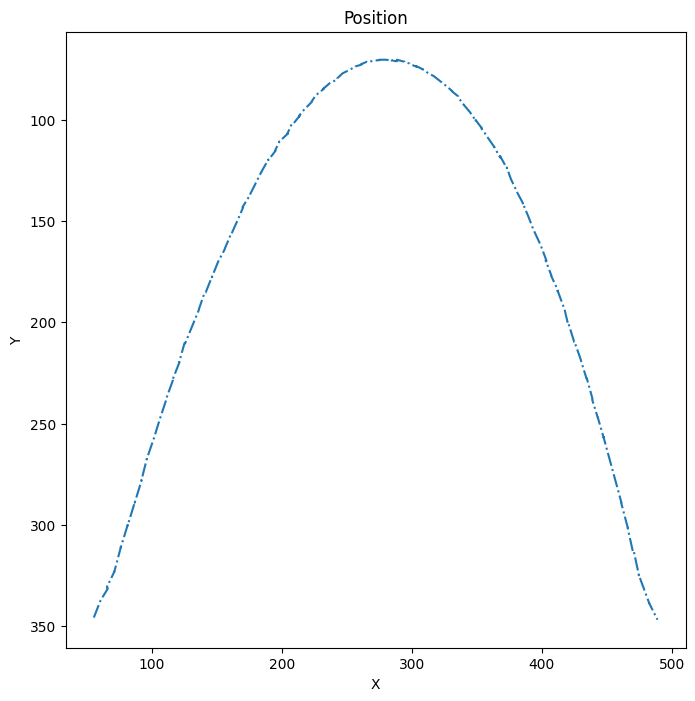

In [26]:
""""""
Y, X = pos.T
""""""
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
ax.plot(X, Y, '-.')
ax.invert_yaxis()
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.set_title('Position')
plt.show()